### Code inspiration:

Some of the code from the book: "Python for Finance Cookbook" has been modified and used for this analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

save_path = fr".../HFT_course/Assignment_1/plots/" # path to where plots should be saved.

In [2]:
# path1 = rf".../HFT_course/Data/usdbtc23.txt"
# path1 = rf".../HFT_course/Data/btc.txt"
# df=pd.read_csv(path1, sep=",", names=["time", "ask", "bid"])
# df.time = pd.to_datetime(df.time, format='%d/%m/%Y %H.%M.%S')
# df["midprice"] = (df["ask"] + df["bid"])/2
# df = df.set_index("time")
# btc = df

btc = pd.read_pickle(rf".../HFT_course/Data/btc.pkl")

In [3]:
def rtn_calc(df):
    df['simple_rtn'] = df.midprice.pct_change()
    df["log_rtn"] = np.log(df.midprice/df.midprice.shift(1))
    df.dropna(axis=0, inplace=True)
    return df

In [4]:
btc = rtn_calc(btc)
btc_min = rtn_calc(btc.groupby(pd.Grouper(freq='min')).mean())
btc_hour = rtn_calc(btc.groupby(pd.Grouper(freq='h')).mean())
btc_day = rtn_calc(btc.groupby(pd.Grouper(freq='d')).mean())

# 1: Bid-ask spread:

In [5]:
btc["spread"] = btc["ask"] - btc["bid"]

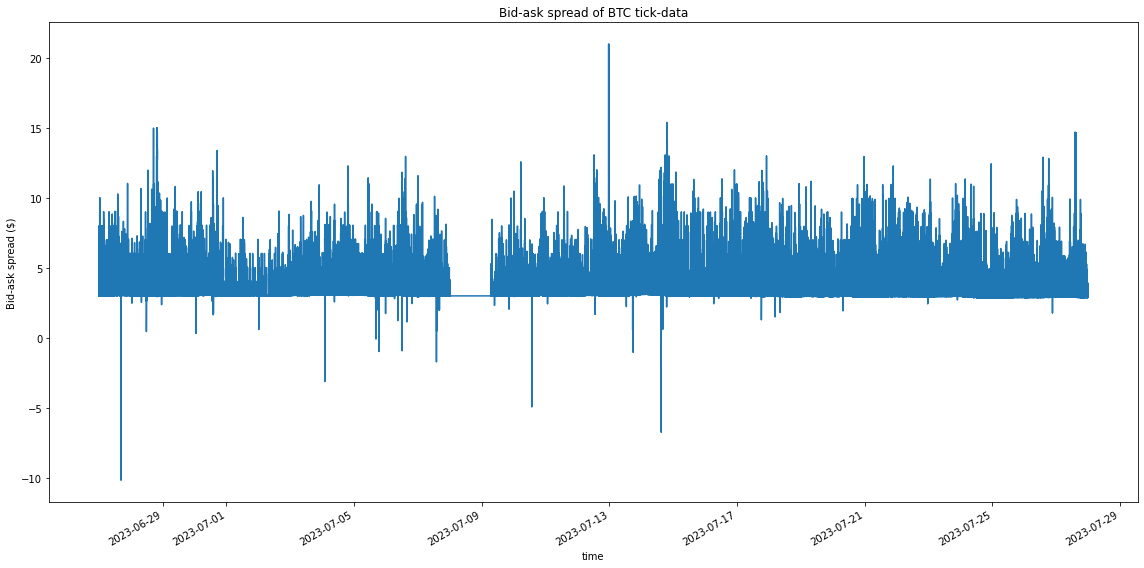

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
btc.spread.plot(title = "Bid-ask spread of BTC tick-data")
plt.xlabel("time")
plt.ylabel("Bid-ask spread ($)")
plt.tight_layout()
plt.savefig(save_path + "spread.png")
plt.show()

In [7]:
btc[btc.spread<0].head()

,ask,bid,midprice,simple_rtn,log_rtn,spread
2023-06-27 16:42:17,30672.14,30679.83,30675.985,0.000175,0.000175,-7.69
2023-06-27 16:42:18,30672.14,30680.64,30676.390,0.000013,0.000013,-8.50
2023-06-27 16:42:19,30672.14,30679.91,30676.025,-0.000012,-0.000012,-7.77
2023-06-27 16:42:20,30672.14,30682.27,30677.205,0.000038,0.000038,-10.13
2023-07-04 02:01:37,31313.69,31314.53,31314.110,0.000016,0.000016,-0.84


# 2: Distribution of data:

In [8]:
def gauss_plotter(df, title, bins=150, path=save_path, name="img.png"):
    """
    This function plots a histogram with an gaussean pdf curve and a qq-plot
    """
    r_range = np.linspace(np.min(df.log_rtn), np.max(df.log_rtn), num=1000)
    mu = df.log_rtn.mean()
    sigma = df.log_rtn.std()
    norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # histogram
    sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0], bins=bins)                                    
    ax[0].set_title(title, fontsize=16)                                                    
    ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
               label=f'N({mu:.2f}, {sigma**2:.4f})')
    ax[0].legend(loc='upper left');

    # QQ-plot
    qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
    ax[1].set_title('QQ-plot', fontsize = 16)

    plt.tight_layout()
    plt.savefig(path + name)
    plt.show()

    
def stats(df):
    """
    This function prints some statistics about the financial data
    """
    jb_test = scs.jarque_bera(df.log_rtn.values)
    print('---------- Descriptive Statistics ----------')
    print('Range of dates:', min(df.index.date), '-', max(df.index.date))
    print('Number of observations:', df.shape[0])
    print(f'Mean: {df.log_rtn.mean():.4f}')
    print(f'Median: {df.log_rtn.median():.4f}')
    print(f'Min: {df.log_rtn.min():.4f}')
    print(f'Max: {df.log_rtn.max():.4f}')
    print(f'Standard Deviation: {df.log_rtn.std():.4f}')
    print(f'Skewness: {df.log_rtn.skew():.4f}')
    print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
    print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

<ipython-input-8-e3dd72b0f8ff>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0], bins=bins)


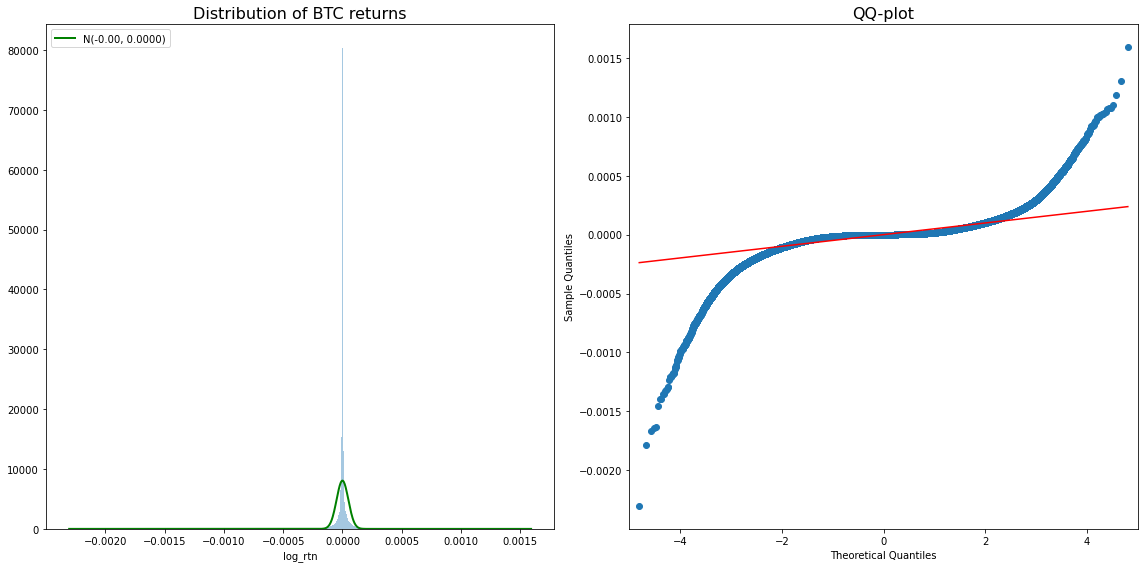

---------- Descriptive Statistics ----------
Range of dates: 2023-06-27 - 2023-07-27
Number of observations: 1306778
Mean: -0.0000
Median: 0.0000
Min: -0.0023
Max: 0.0016
Standard Deviation: 0.0000
Skewness: -1.1467
Kurtosis: 56.2905
Jarque-Bera statistic: 172813289.00 with p-value: 0.00


In [9]:
gauss_plotter(btc, bins=1500, title='Distribution of BTC returns', name="tick_hist.png")
stats(btc)

<ipython-input-8-e3dd72b0f8ff>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0], bins=bins)


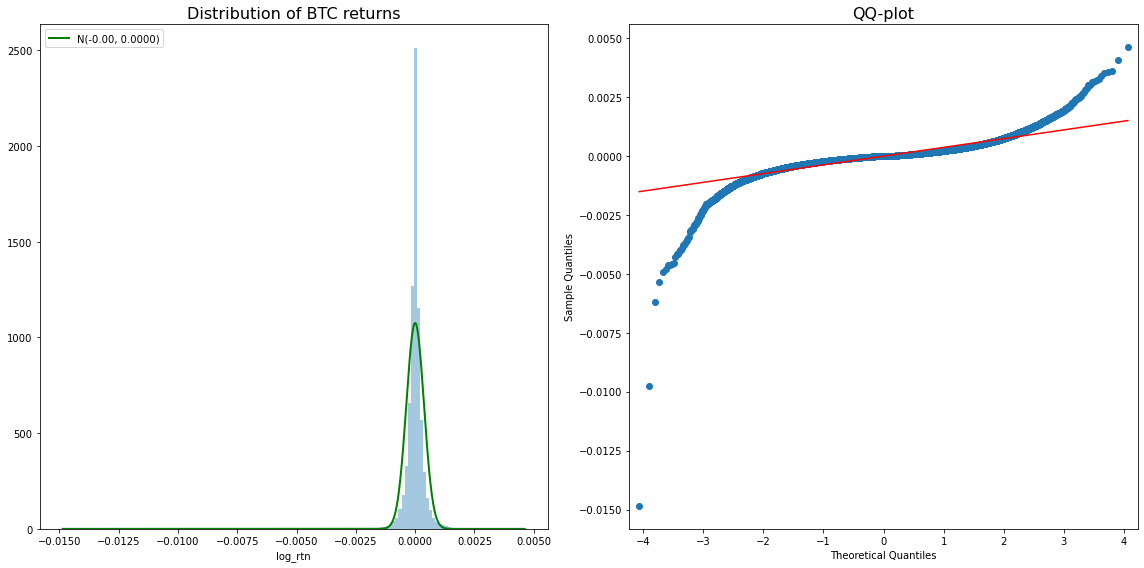

---------- Descriptive Statistics ----------
Range of dates: 2023-06-27 - 2023-07-27
Number of observations: 41979
Mean: -0.0000
Median: -0.0000
Min: -0.0148
Max: 0.0046
Standard Deviation: 0.0004
Skewness: -2.6426
Kurtosis: 92.4248
Jarque-Bera statistic: 14986862.45 with p-value: 0.00


In [10]:
gauss_plotter(btc_min, title='Distribution of BTC returns', name="min_hist.png")
stats(btc_min)

<ipython-input-8-e3dd72b0f8ff>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0], bins=bins)


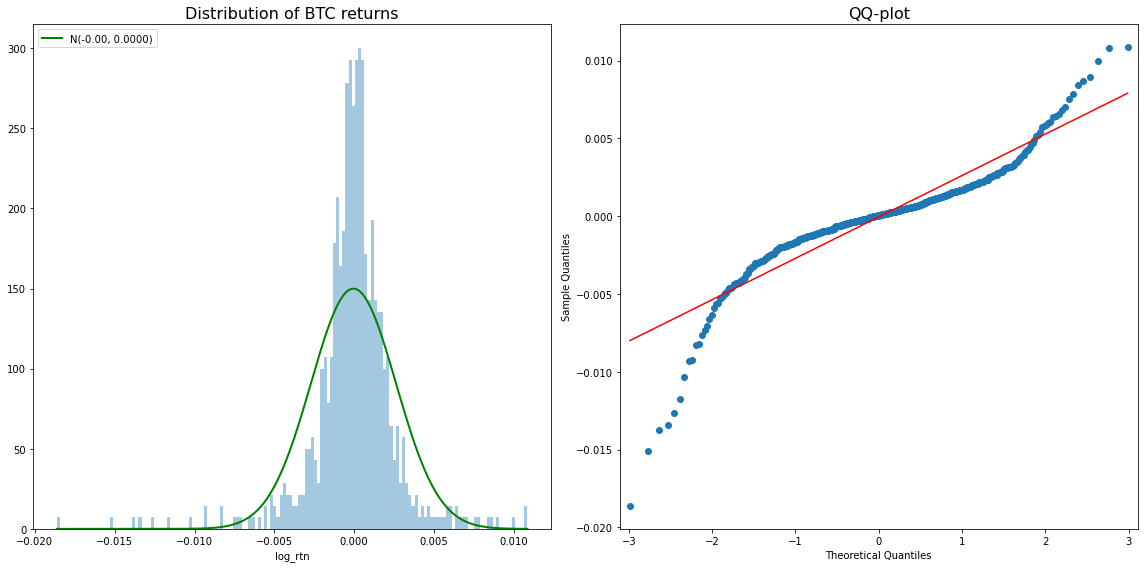

---------- Descriptive Statistics ----------
Range of dates: 2023-06-27 - 2023-07-27
Number of observations: 713
Mean: -0.0000
Median: 0.0001
Min: -0.0186
Max: 0.0108
Standard Deviation: 0.0027
Skewness: -1.1537
Kurtosis: 9.1640
Jarque-Bera statistic: 2613.02 with p-value: 0.00


In [11]:
gauss_plotter(btc_hour, title='Distribution of BTC returns', name="hour_hist.png")
stats(btc_hour)

<ipython-input-8-e3dd72b0f8ff>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0], bins=bins)


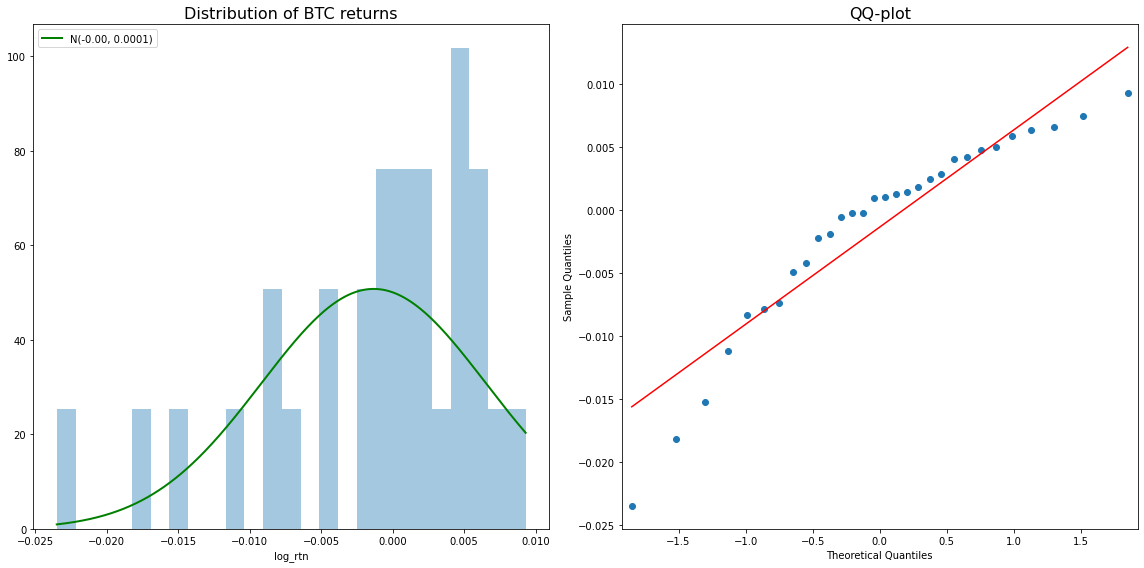

---------- Descriptive Statistics ----------
Range of dates: 2023-06-28 - 2023-07-27
Number of observations: 30
Mean: -0.0013
Median: 0.0010
Min: -0.0235
Max: 0.0093
Standard Deviation: 0.0079
Skewness: -1.2154
Kurtosis: 1.2154
Jarque-Bera statistic: 7.51 with p-value: 0.02


In [12]:
gauss_plotter(btc_day, bins=25, title='Distribution of BTC returns', name="day_hist.png")
stats(btc_day)

# 3: Autocorrelation:

In [15]:
def acf_plotter(df, lags=50, sig=0.05, title="Autocorrelation", 
                path=save_path, name="img.png"):
    """
    This function plots the acf plot of the returns given in "df".
    """
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    acf = smt.graphics.plot_acf(df.log_rtn, 
                                lags=lags, 
                                alpha=sig,
                                ax=ax[0])
    ax[0].set_title("Autocorrelation of " + title)
    
    acf = smt.graphics.plot_acf(df.log_rtn.pow(2), 
                                lags=lags, 
                                alpha=sig,
                                ax=ax[1])
    ax[1].set_title("Autocorrelation of squared " + title)
    
    acf = smt.graphics.plot_acf(df.log_rtn.abs(), 
                                lags=lags, 
                                alpha=sig,
                                ax=ax[2])
    ax[2].set_title("Autocorrelation of absolute " + title)

    fig.supylabel("Significance level")
    fig.supxlabel("Number of lags")
    plt.tight_layout()
    plt.savefig(path + name)
    plt.show()

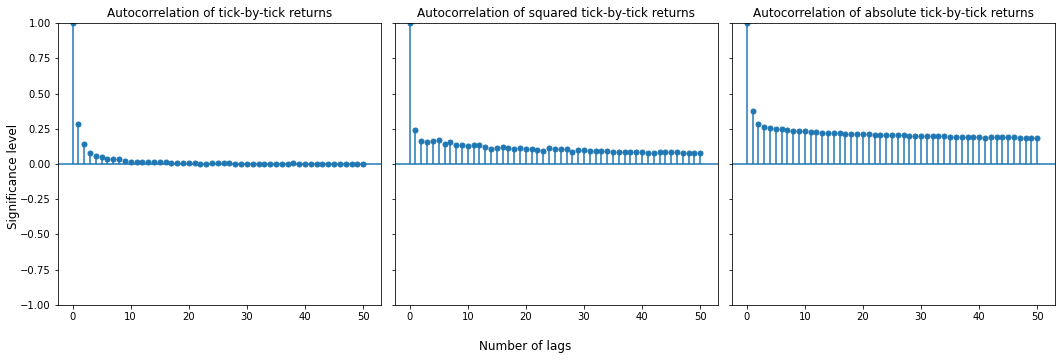

In [16]:
acf_plotter(btc, title="tick-by-tick returns", name="ACF_tick")

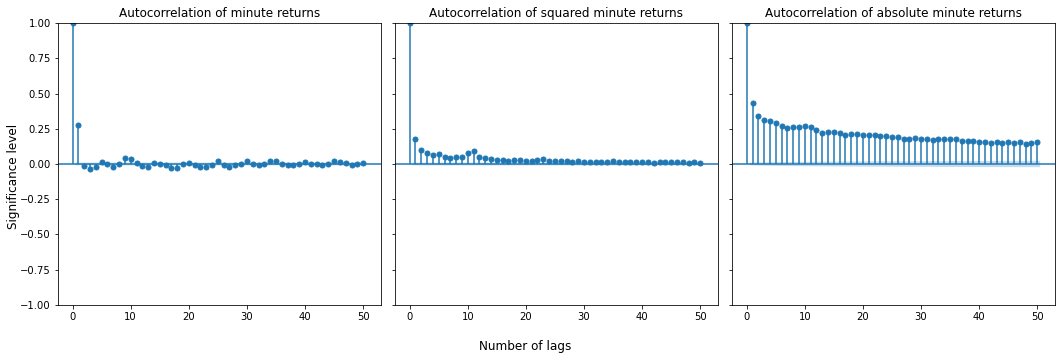

In [17]:
acf_plotter(btc_min, title="minute returns", name="ACF_min")

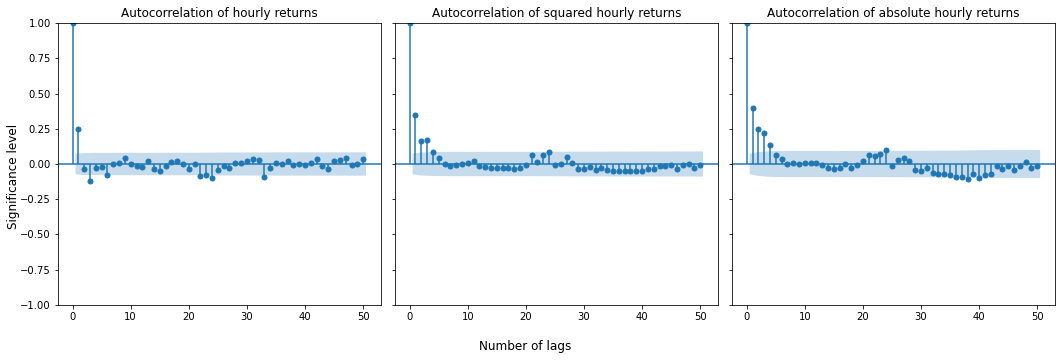

In [18]:
acf_plotter(btc_hour, title="hourly returns", name="ACF_hour")

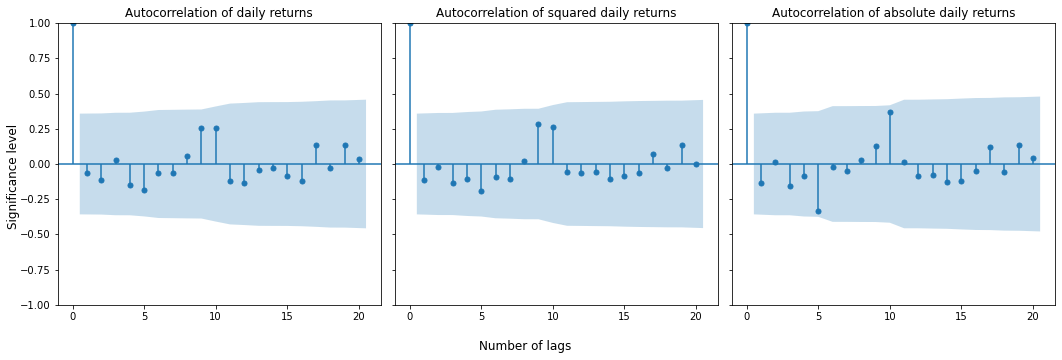

In [19]:
acf_plotter(btc_day, lags=20, title="daily returns", name="ACF_day")

# 4: Volatility clustering:

In [18]:
def volatility_plotter(df, title="", 
                       path=save_path, name="img.png"):
    df['moving_std_50'] = df[['log_rtn']].rolling(window=50).std()
    df['moving_std_10'] = df[['log_rtn']].rolling(window=10).std()

    fig, ax = plt.subplots(3, 1, figsize=(18, 15), 
                           sharex=True)

    df.midprice.plot(ax=ax[0])
    ax[0].set(title=title + " time series",
              ylabel='Price ($)')

    df.log_rtn.plot(ax=ax[1])
    ax[1].set(ylabel='Log returns (%)')

    df.moving_std_10.plot(ax=ax[2], color='g', 
                          label='Moving Volatility 10')
    df.moving_std_50.plot(ax=ax[2], color='r', 
                           label='Moving Volatility 50')
    ax[2].set(ylabel='Moving Volatility',
              xlabel='Date')
    ax[2].legend()

    plt.tight_layout()
    plt.savefig(save_path + name)
    plt.show()

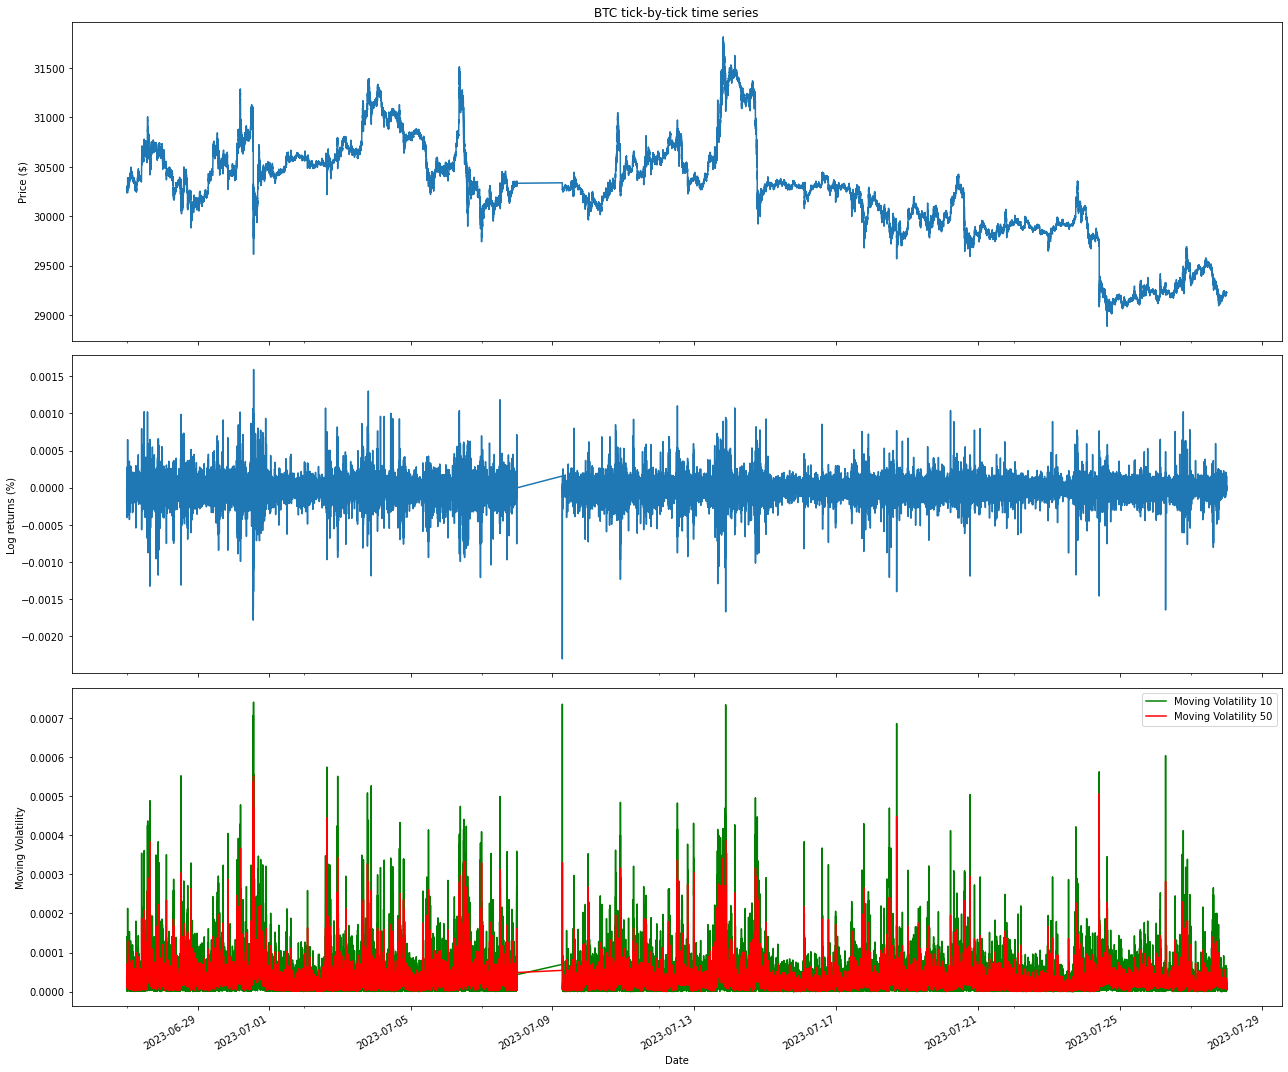

In [19]:
volatility_plotter(btc, title="BTC tick-by-tick", name="vol_tick")

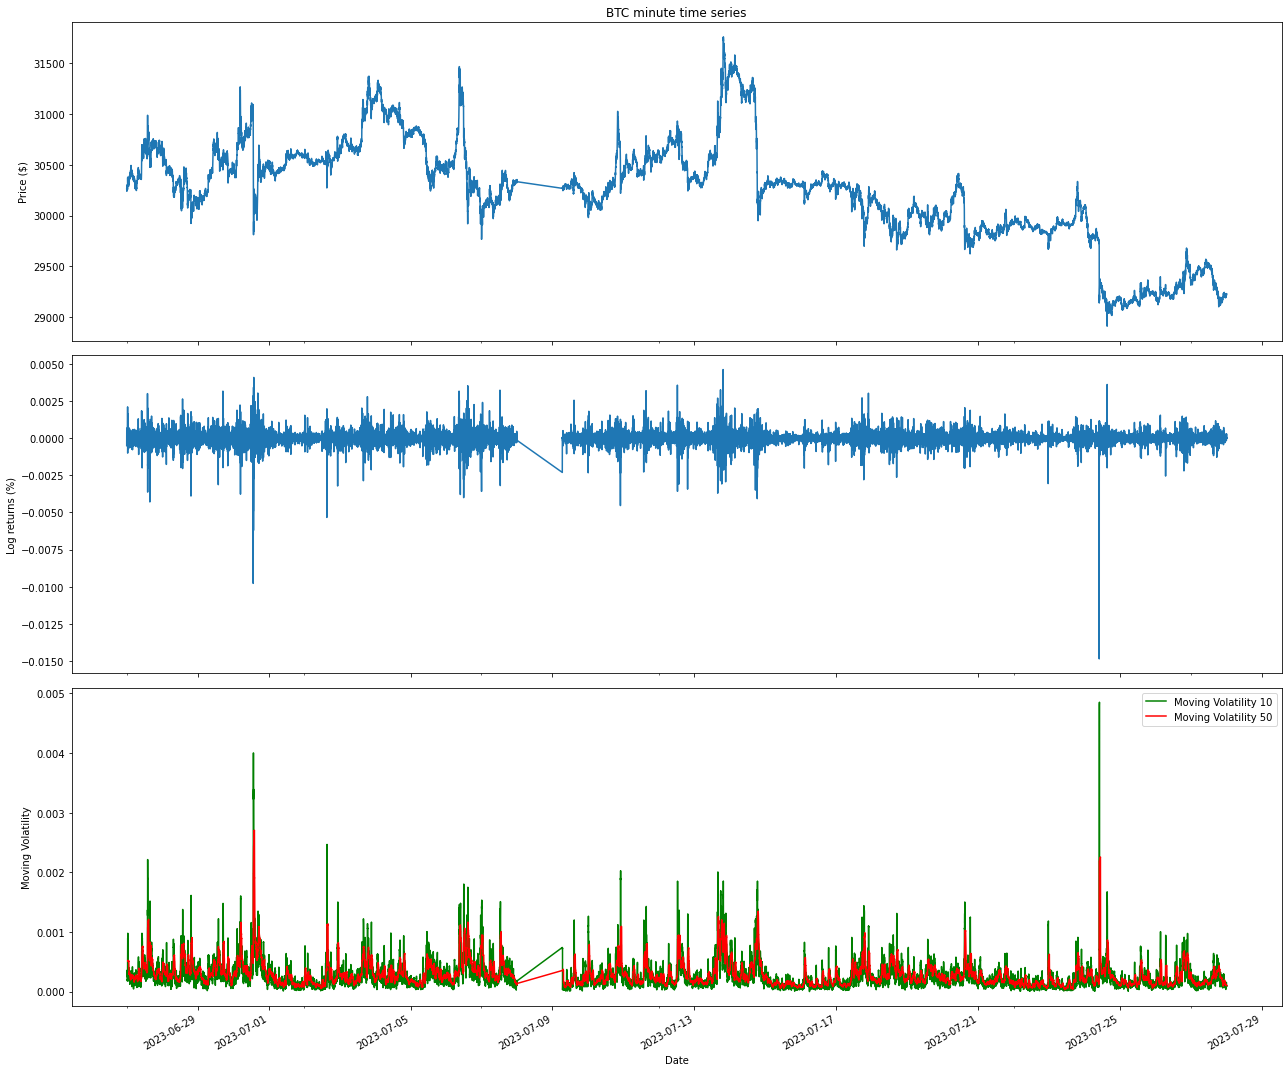

In [20]:
volatility_plotter(btc_min, title="BTC minute", name="vol_min")

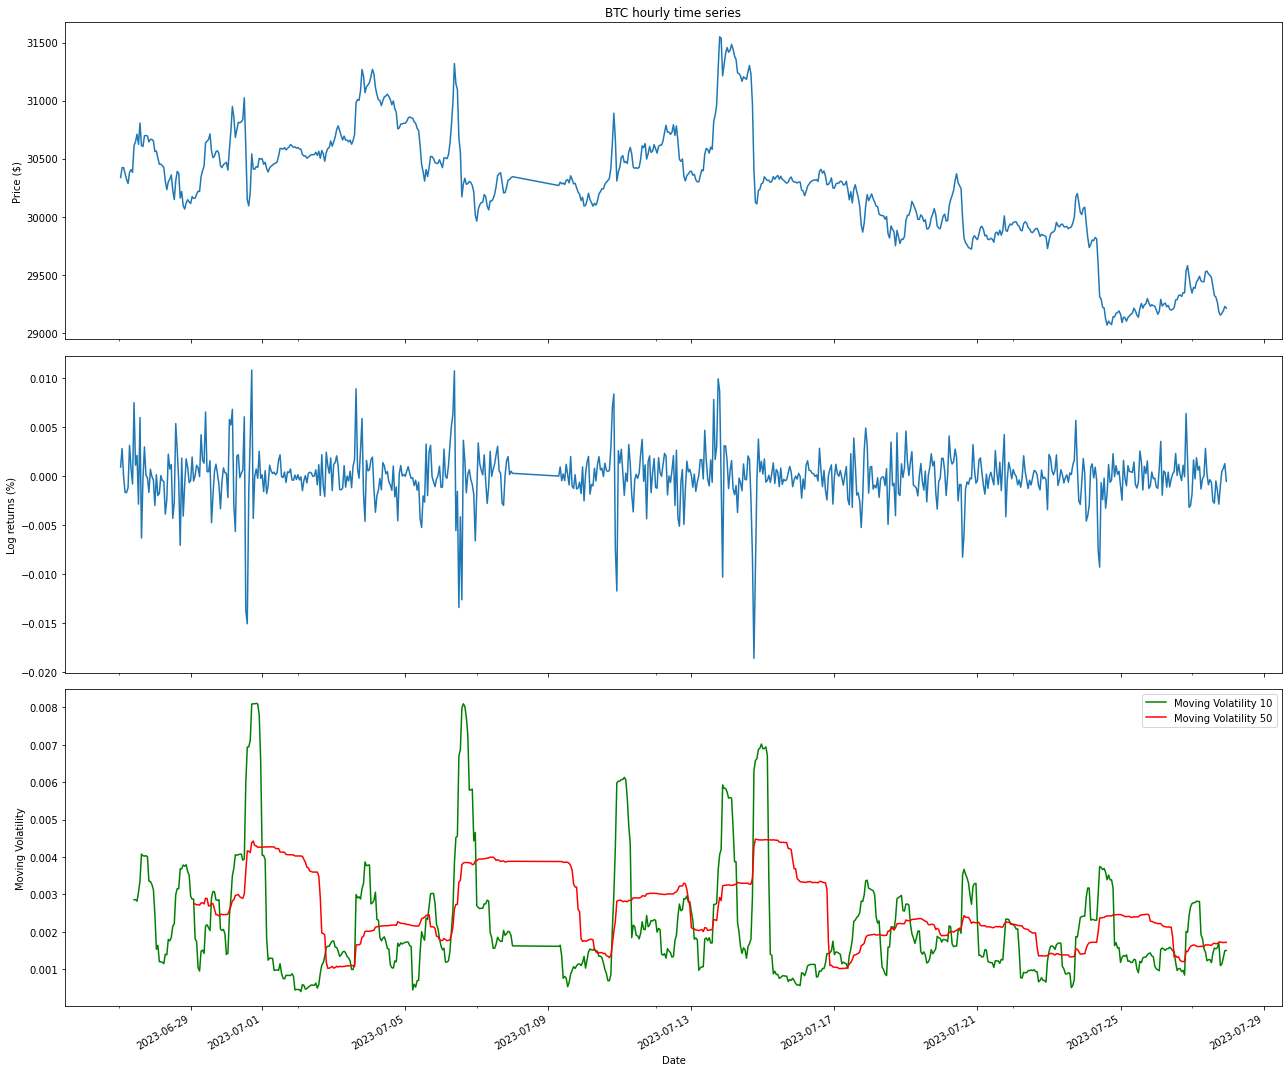

In [21]:
volatility_plotter(btc_hour, title="BTC hourly", name="vol_hour")

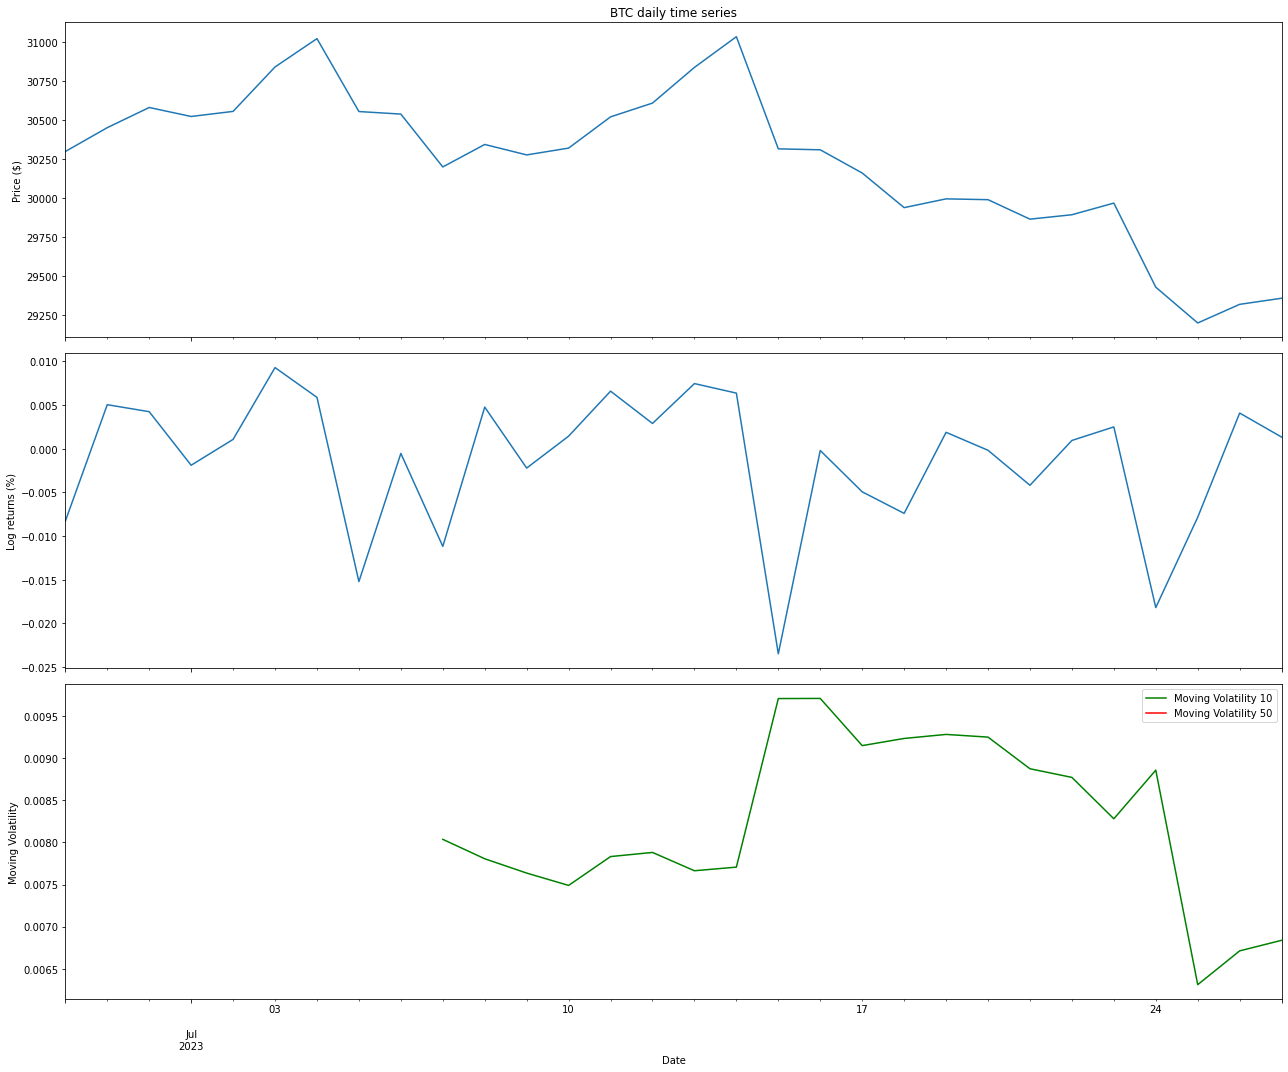

In [22]:
volatility_plotter(btc_day, title="BTC daily", name="vol_day")